# Statistical Methods (SS18) {-}
## David Bubeck, Henrik Lukas Ruh & Manuel Bayer {-}
## Exercise 3 for August 9, 2018, 9:00 {-}

### 3.1 A graphical demonstration of the central limit theorem {-}
Give a graphical demonstration of the central limit theorem. To this end, average a number of N of
very non-Gaussian uniform distributions U(0; 4) (note lower and upper limit!).

#### a: Plot a series of histograms demonstrating the convergence with increasing number N. Choose resonable axis-scalings. Overlay the expected normal distribution. Hint: if you have trouble with the normalization of the histogram, you may try truehist() from the library MASS instead of hist.


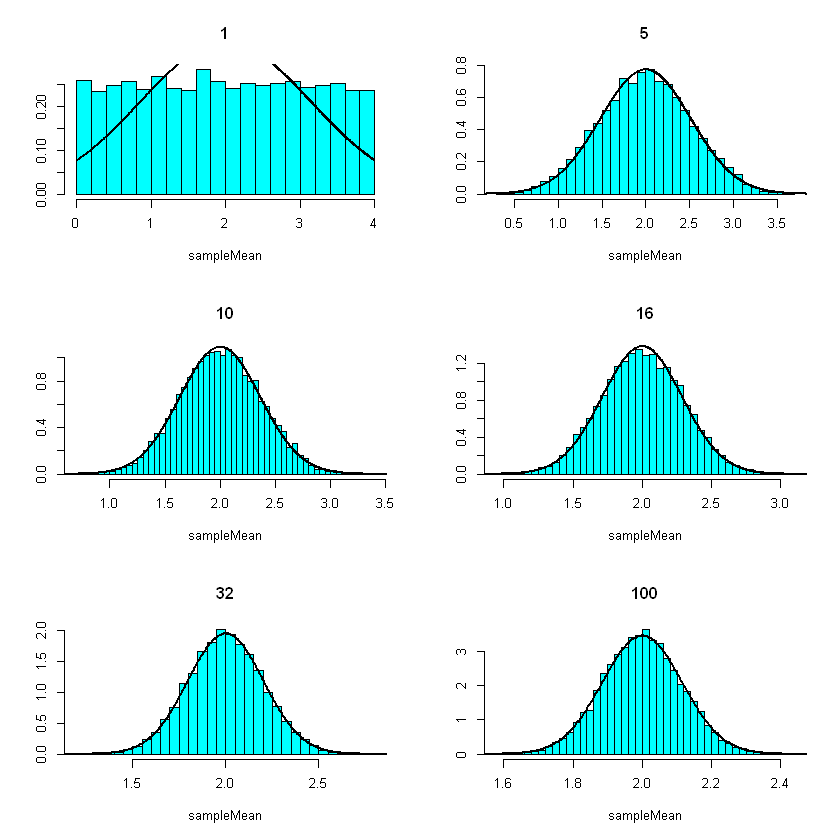

In [365]:
library("MASS")

set.seed(123) ## set the seed for reproducibility
sets <- 10000 # set of samples

numberHist <- 1:6 # number of histograms which will be produced
N <- c(1, 5, 10, 16, 32, 100) # number of samples

# uniform distribution
# limits for uniform distribution
a <- 0
b <- 4
# calculate mean and variance of uniform distribution
mu = 0.5 * (a + b)
var = (b - a)^2 / 12

# png("CLT_Histograms.png")
p <- par(mfrow = c(3, 2))
for (i in numberHist) {
    # produce a matrix of samples and build row mean to plot into a 
    # normalizes histogram
    samples <- matrix(runif(sets * N[i], a, b),,nrow = sets,
                      ncol = N[i])
    sampleMean <- rowMeans(samples)
    truehist(sampleMean, main = N[i])
    # overplot a normal distribution
    x <- seq(0, 4, length = 1000)
    lines(x, dnorm(x, mu, sqrt(var)/sqrt(N[i])), lwd = 2)
}
par(p)

# the numbers above the subplots correspods to the number of samples N


#### b: How large must be N to get a reasonable correspondence? How could one quantify the convergence?

As observed in the plot above reasonable correspondence to the normal distribution is reached at rather small values of N which is unexpected. 

To quantify the convergence one can try to compute the $\chi^2$ between the averaged uniform and the expected normal distribution and minimise it. 

#### c: Try to do the same using a Cauchy instead of a uniform distribution! Do you have an explanation for the behavior?

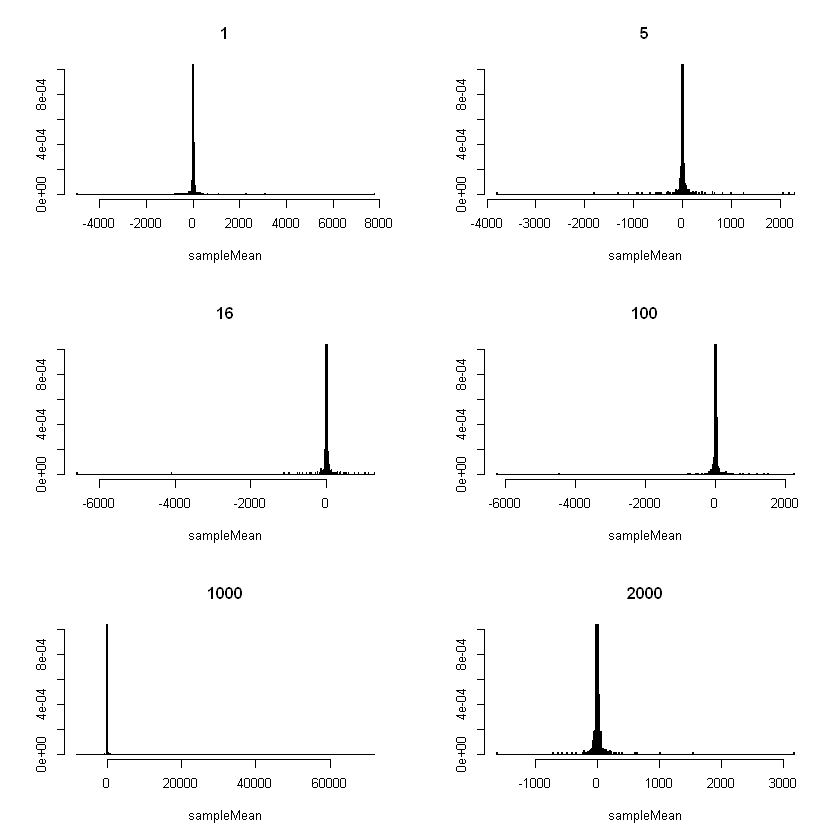

In [366]:
# cauchy distribution
# cauchy distribution has a undefined mean and variance
N <- c(1, 5, 16, 100, 1000, 2000) # number of samples
# png("CLT_Histograms_cauchy.png")
p <- par(mfrow = c(3, 2))
for (i in numberHist) {
    # produce a matrix of samples and build row mean to plot into a 
    # normalizes histogram
    samples <- matrix(rcauchy(sets * N[i]), nrow = sets, ncol = N[i])
    sampleMean <- rowMeans(samples)
    truehist(sampleMean, main = N[i], ylim = c(0, 0.001))
}
par(p)

# the numbers above the subplots correspods to the number of samples N

The reason why the averaged Cauchy distributions does not fit the normal distribution is due to the behaviour of the Cauchy distribution since it has no defined mean. In the plot the limits of the y-axis were scaled down to see the resulting distributions better. Moreover, we can see that the averaged Cauchy distributions are more narrowly distributed than the averaged uniform distributions.

### 3.2 Testing mean, median, and trimean for eficiency and robustness {-}
Commonly, mean and median are used as estimators for the mean of a symmetric distribution. An-
other, less known one, is the trimean which is a weighted average of the distribution's median and
first and third quartiles
$$
\hat{\mu}_{\mathrm{TM}} \equiv \frac{1}{4}(Q_1 + 2Q_2 + Q_3)
$$
Test the 3 estimators for a normal distribution $N(0; 1)$! To be specific use a sample size of 20. Convince
youself that your MC results are statistically significant by varying the number of Monte Carlo trials.

#### a: Write an R-function which calculates the trimean! Hint: The function quantile() can help here.

In [153]:
# define function

trimean <- function(X){
    return(0.25*sum(quantile(X,c(0.25,0.5,0.75),
                             names = FALSE)*c(1,2,1)))
}

In [154]:
# test function

trimean(1:10)

[1] 5.5

#### b: Run Monte Carlo tests to check that the estimators are indeed all unbiased.

We have three estimators: mean, median and trimean of our sample.

Also, we know that for N(0;1) the true mean equals zero, the true median equals zero, and the true trimean is:

In [239]:
mean_true <- 0
median_true <- 0

trimean_true <- 0.25*sum(qnorm(c(0.25,0.5,0.75))*c(1,2,1))
cat('trimean_true = ',trimean_true)

trimean_true =  0

Intialise $2.5 \times 10^4$ Monte Carlo runs, where each sample has 20 elements:

In [264]:
n <- 20 # number of elements of a sample
M <- 2.5e4 # number of Monte Carlo runs

#set.seed(100)
sample <- matrix(rnorm(n*M),n,M)

compute the bias:

In [265]:
# herefore we us rowMeans and create analoque functions for median and
# trimean

rowMedians <- function(x){
    apply(x, 2, median) 
}

rowTrimeans <- function(x){
    apply(x, 2, trimean) 
}

cat('mean:\n','bias = ',(mean_true-mean(rowMeans(sample))),'\n')

cat('median:\n','bias = ',(median_true-mean(rowMedians(sample))),'\n')

cat('trimean:\n','bias = ',(trimean_true-mean(rowTrimeans(sample))),
    '\n')

mean:
 bias =  0.001324761 
median:
 bias =  0.0004396846 
trimean:
 bias =  0.0009037913 


Now, we do the same for $10^5$ Monte Carlo runs:

In [266]:
n <- 20 # number of elements of a sample
M <- 1e5 # number of Monte Carlo runs

#set.seed(50)
sample <- matrix(rnorm(n*M),n,M)


cat('mean:\n','bias = ',(mean_true-mean(rowMeans(sample))),'\n')

cat('median:\n','bias = ',(median_true-mean(rowMedians(sample))),'\n')

cat('trimean:\n','bias = ',(trimean_true-mean(rowTrimeans(sample))),
    '\n')

mean:
 bias =  -0.0001299724 
median:
 bias =  0.0001855778 
trimean:
 bias =  5.71593e-06 


We observe that the bias is small. Thus, we regard the estimators as unbiased. 


Furthermore, we observe that the bias decreasing with increasing number of Monte Carlo runs as expected.

#### c: Test the efficiency of the 3 estimators! Which performs best? What is the ratio of the efficiency of the less-performing estimators to the best one? What does this mean?

In [312]:
n = 20 # number of elements of a sample
M = 1e4 # number of Monte Carlo runs

set.seed(100)
sample <- matrix(rnorm(n*M),n,M)

efficiency_mean <- mean((mean_true-rowMeans(sample))**2)

efficiency_median <- mean((median_true-rowMedians(sample))**2)

efficiency_trimean <- mean((trimean_true-rowTrimeans(sample))**2)

cat('mean:\n','efficiency = ',efficiency_mean,'\n')

cat('median:\n','efficiency = ',efficiency_median,'\n')

cat('trimean:\n','efficiency = ',efficiency_trimean,'\n')

mean:
 efficiency =  0.0001025771 
median:
 efficiency =  0.07448746 
trimean:
 efficiency =  0.05914382 


The efficiency is smallest (thus best) for the mean estimator. The median estimator has the largest (thus worst) efficiency. Their ratios of the efficiency is:

In [356]:
cat('efficiency_median/efficiency_mean = ',
    efficiency_median/efficiency_mean,'\n')

cat('efficiency_trimean/efficiency_mean = ',
    efficiency_trimean/efficiency_mean,'\n')

efficiency_median/efficiency_mean =  726.1608 
efficiency_trimean/efficiency_mean =  576.5792 


This means the mean square deviation of the mean estimator from the true value is much smaller than the mean square deviation of the other two estimators. In other words, single Monte Carlo simulations will give results which are on average closer to the true value for the mean estimator.  

#### d: Add one (rather extreme) outlier drawn from a uniform distribution $U(-20; 20)$. Test the robustness by looking at the mean-square error in the cases. What is their relative performance?

In [343]:
n = 20 # number of elements of a sample
M = 20 # number of Monte Carlo runs

# intitialise outlayers
set.seed(50)
outlayers <- runif(M,min=-20,max=20)

# intialise samples with oulayers
set.seed(50)
# n+1 is for one additional entry for the outlayer
mod_sample <- t( matrix(c(rnorm(n*M),outlayers),M,n+1) )

In [345]:
# compute the mean-square error

mod_efficiency_mean <- mean((mean_true-rowMeans(mod_sample))**2)

mod_efficiency_median <- mean((median_true-rowMedians(mod_sample))**2)

mod_efficiency_trimean <- mean((trimean_true-rowTrimeans(
        mod_sample))**2)

cat('mean:\n','efficiency = ',mod_efficiency_mean,'\n')

cat('median:\n','efficiency = ',mod_efficiency_median,'\n')

cat('trimean:\n','efficiency = ',mod_efficiency_trimean,'\n')

mean:
 efficiency =  0.8795355 
median:
 efficiency =  0.05699134 
trimean:
 efficiency =  0.04898051 


In [352]:
n = 20 # number of elements of a sample
M = 1e4 # number of Monte Carlo runs

# intitialise outlayers
set.seed(50)
outlayers <- runif(M,min=-20,max=20)

# intialise samples with oulayers
set.seed(50)
# n+1 is for one additional entry for the outlayer
mod_sample <- t( matrix(c(rnorm(n*M),outlayers),M,n+1) )

In [353]:
# compute the mean-square error

mod_efficiency_mean <- mean((mean_true-rowMeans(mod_sample))**2)

mod_efficiency_median <- mean((median_true-rowMedians(mod_sample))**2)

mod_efficiency_trimean <- mean((trimean_true-rowTrimeans(
    mod_sample))**2)

cat('mean:\n','efficiency = ',mod_efficiency_mean,'\n')

cat('median:\n','efficiency = ',mod_efficiency_median,'\n')

cat('trimean:\n','efficiency = ',mod_efficiency_trimean,'\n')

mean:
 efficiency =  0.001352009 
median:
 efficiency =  0.07948425 
trimean:
 efficiency =  0.06235928 


We expect that the median is less senstive to outlayers than the mean, and we observe that this for a small number of Monte Carlo runs. Appearently, the trimean is even more efficient. The importance of the outlayer decreases with increasing number of Monte Carlo runs. Hence, we observe that the mean is most efficient in the case of a large number of Monte Carlo runs.

In [355]:
cat('efficiency_median/efficiency_mean = ',
    mod_efficiency_median/mod_efficiency_mean,'\n')

cat('efficiency_trimean/efficiency_mean = ',
    mod_efficiency_trimean/mod_efficiency_mean,'\n')

efficiency_median/efficiency_mean =  58.78973 
efficiency_trimean/efficiency_mean =  46.12342 


As before, we see that the mean estimator is best and the median is worst in terms of efficiency perfomance for a large number of Monte Carlo runs..